In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [10]:
class GradeState(TypedDict):
    marks: float
    total_marks: float
    percentage: float
    grade: str

In [11]:
def calculate_percentage(state: GradeState) -> GradeState:
    marks = state["marks"]
    total = state["total_marks"]
    percentage = (marks / total) * 100

    state["percentage"] = round(percentage, 2)
    return state

In [12]:
def label_grade(state: GradeState) -> GradeState:
    percentage = state["percentage"]

    if percentage >= 85:
        state["grade"] = "A+"
    elif percentage >= 70:
        state["grade"] = "A"
    elif percentage >= 60:
        state["grade"] = "B"
    elif percentage >= 50:
        state["grade"] = "C"
    else:
        state["grade"] = "Fail"

    return state

In [13]:
graph = StateGraph(GradeState)

graph.add_node("calculate_percentage", calculate_percentage)
graph.add_node("label_grade", label_grade)

graph.add_edge(START, "calculate_percentage")
graph.add_edge("calculate_percentage", "label_grade")
graph.add_edge("label_grade", END)

In [14]:
workflow = graph.compile()

In [15]:
initial_state = {"marks": 73, "total_marks": 100}
final_state = workflow.invoke(initial_state)
print(final_state)

{'marks': 73, 'total_marks': 100, 'percentage': 73.0, 'grade': 'A'}


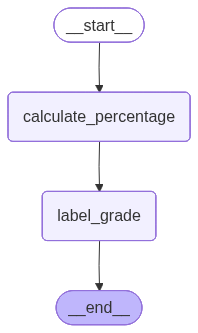

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())